# Linear regression implementation 

In [1]:
# lets import the important libraries
# start with the libraries you already know first
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [4]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [5]:
dataset = pd.read_csv('50_Startups.csv')

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
# These are the actual sets of libraries we would need so lets import
import numpy as np 
import pandas as pd
from numpy import math

#below are the machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# We have alread imorted the dataset
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
# let's try to understand the dataset

In [10]:
dataset.shape

(50, 5)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [14]:
dataset.isna().sum().sum()

0

In [15]:
# so we have a cleaned data already 

In [16]:
# let's do a plot and understand the dataset more closely 

dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [17]:
# Profit is our target variable and rest are features lets plot the graph with features vs profit  

# Let's do a plot of all the featueres  with the target one by one 

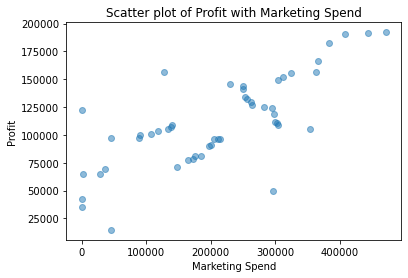

In [18]:
plt.scatter(dataset['Marketing Spend'],dataset['Profit'],alpha = 0.5) # marketing spend on the xaxis  and profit on y aixs 
#alpha = regulates the trasperacy of the points
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


## Now that we have the data representation graphically lets try to fit a line though by looking at the distribution we can say there is a linear relation between marketing spend and profit 

In [19]:
# here is how you fit a line/proboala on a data 

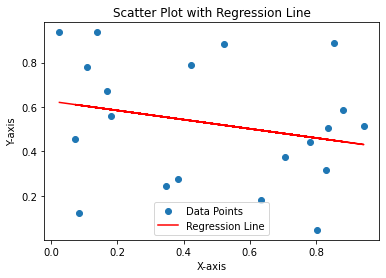

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.random.rand(20)
y = np.random.rand(20)

# Create a scatter plot
plt.scatter(x, y, label='Data Points')

# Fit a linear regression line to the data
coefficients = np.polyfit(x, y, 1)
line = np.polyval(coefficients, x)

# Plot the linear regression line
plt.plot(x, line, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Regression Line')
plt.legend()

# Display the plot
plt.show()


# polyfit
it basically find the best fit line between using least square i.e the error between the predicated and the actual is very less just line we did in the sse part

In [21]:
# lets understand what is poly fit first 
#it basically find the best fit line for a given data 
# the np.polyfit returns the coefficients of that line 
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3.5, 5, 8, 11])

coefficients = np.polyfit(x, y, 1) # deg = 1 , the 1 represent that it will give i.e x^1 type if 2 it will give parabola i.e x^2
# basicaaly np.polyfit has x,y and degree of line you want ot fit and it retrun it will give you coefficient of that line 

print(f'the m is {coefficients[0]} and the c is {coefficients[1]}')

the m is 2.249999999999999 and the c is -0.8499999999999976


In [22]:
# using the above coefficeint we can get x and y and plot the line/parabola 

#coefficients = np.array([1, -2, 1])  # Coefficients of a quadratic polynomial: x^2 - 2x + 1
x_values = np.array([0, 1, 2, 3])

y_values = np.polyval(coefficients, x_values)
print(y_values)
# you have x you have y plot it 

[-0.85  1.4   3.65  5.9 ]


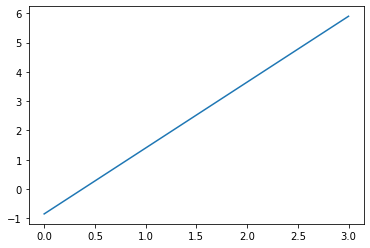

In [23]:
plt.plot(x_values,y_values) 

## so this is what we will do on the data of marketing and profit as well and see if there is a relation 

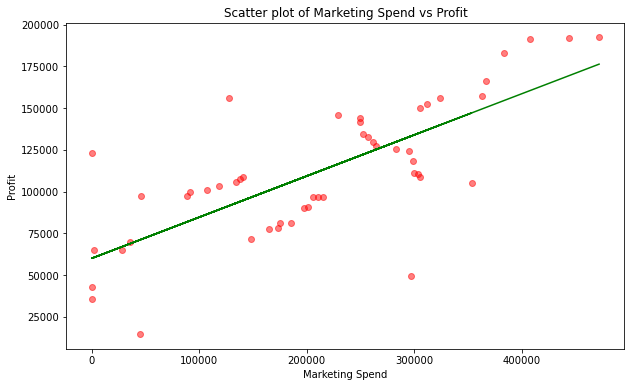

In [24]:
plt.figure(figsize = (10,6))
plt.scatter(dataset['Marketing Spend'],dataset['Profit'],alpha = 0.5,color = 'red')
plt.title('Scatter plot of Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
coefficients=np.polyfit(dataset['Marketing Spend'],dataset['Profit'],1) # this gives us the slope and constand of line as deg=1
# x_values = np.linspace(1,100,10) # values of line to plot graph
x_values = dataset['Marketing Spend']
y_values = np.polyval(coefficients,x_values)
plt.plot(x_values,y_values,color = 'green',alpha = 1)
plt.show()

# Note this is the best fit line when we have one feature and respective target value  
# Note The line is darker at the middel and ligher at the ends because we have more data point in the midde part 

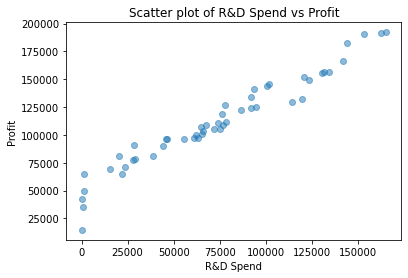

In [25]:
# let's do it for other as well 

plt.scatter(dataset['R&D Spend'],dataset['Profit'],alpha = 0.5)
plt.title('Scatter plot of R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

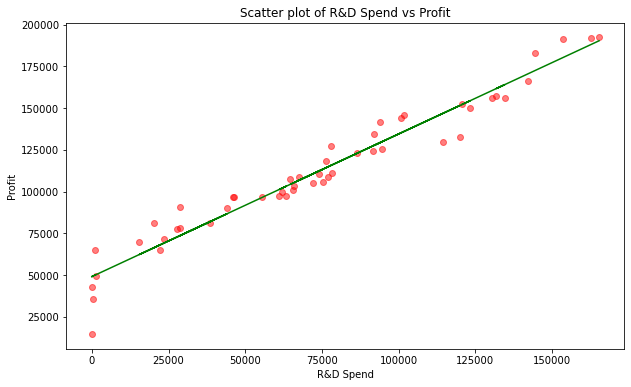

In [26]:
plt.figure(figsize = (10,6))

plt.scatter(dataset['R&D Spend'],dataset['Profit'],alpha = 0.5,color = 'red')
plt.title('Scatter plot of R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
coefficients = np.polyfit(dataset['R&D Spend'],dataset['Profit'],1)
y_values = np.polyval(coefficients,dataset['R&D Spend'])
plt.plot(dataset['R&D Spend'],y_values,color = 'green')
plt.show()

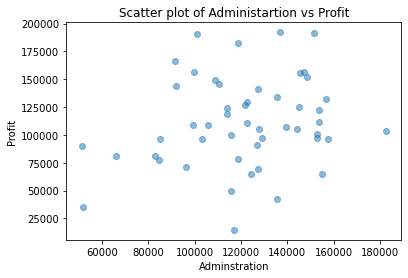

In [27]:
plt.scatter(dataset['Administration'],dataset['Profit'],alpha = 0.5)
plt.title('Scatter plot of Administartion vs Profit')
plt.xlabel('Adminstration')
plt.ylabel('Profit')
plt.show()

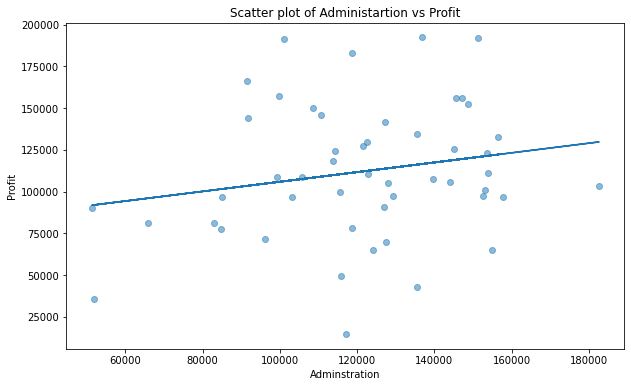

In [28]:
plt.figure(figsize = (10,6))

plt.scatter(dataset['Administration'],dataset['Profit'],alpha = 0.5)
plt.title('Scatter plot of Administartion vs Profit')
plt.xlabel('Adminstration')
plt.ylabel('Profit')

coefficient = np.polyfit(dataset['Administration'],dataset['Profit'],1)
y_values = np.polyval(coefficient,dataset['Administration'])
plt.plot(dataset['Administration'],y_values)
plt.show()

We can see above that there is no linear relationship between administration and profit as the datapoint are distributed all across the line with no linear parttern

Since there is no linear relationship between the administration and Profit we can drop this column but for now let's just try to built a vanila model so we will include it rather. 

## There is a discreate variable which is State lets check the satewise porfit

In [29]:
#let's revist the group by first

In [30]:

dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [31]:
print(dataset['State'].unique()) # this is to find the unique state
print(dataset['State'].nunique()) # count of unique 

['New York' 'California' 'Florida']
3


In [32]:
#way 1
dataset.groupby('State')['Profit'].sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

In [33]:
#way2
dataset.groupby('State',as_index = False).agg({'Profit':'sum'})

,State,Profit
0,California,1766387.98
1,Florida,1900384.39
2,New York,1933859.59


<AxesSubplot:xlabel='State'>

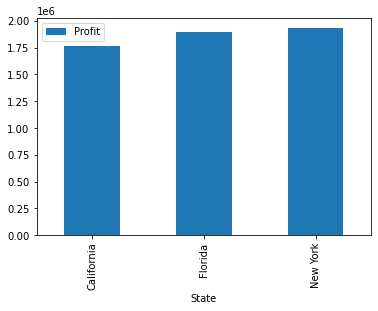

In [34]:
dataset.groupby('State').agg({'Profit':'sum'}).plot(kind = 'bar') # this is a short way of doing the plot

Text(0, 0.5, 'Profit')

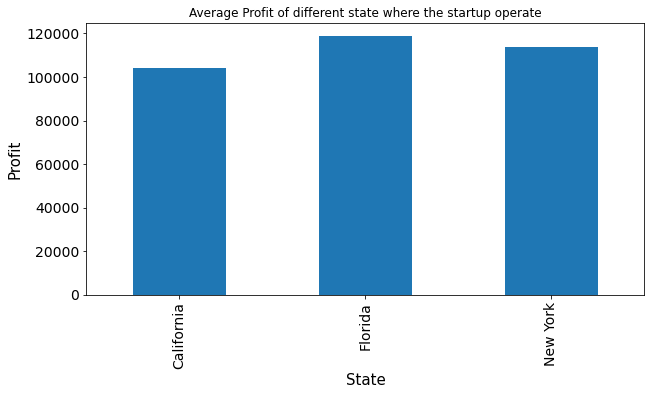

In [35]:
ax = dataset.groupby('State')['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#setting the title
ax.set_title('Average Profit of different state where the startup operate')

#setting the x and y lables
ax.set_xlabel('State',fontsize = 15)
ax.set_ylabel('Profit',fontsize = 15)

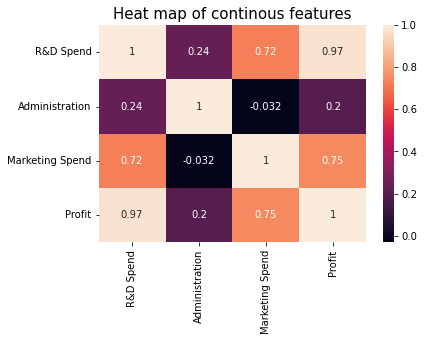

In [36]:
sns.heatmap(dataset.corr(),annot = True)

plt.title('Heat map of continous features',fontsize = 15)

plt.show()

## let's also check the VIF scores of the features as well
I have explained the vif in the linear regression lecture

In [37]:
# import the variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#droping the target and discrete variable 
df_vif=dataset.drop(['Profit','State'],axis = 1)

# variance_inflation_factor takes array as argument so the df.values will help here 

In [39]:
for i in range(len(df_vif.columns)):
    print(f'{df_vif.columns[i]} : {round(variance_inflation_factor(df_vif.values,i),3)}')

R&D Spend : 8.385
Administration : 4.026
Marketing Spend : 7.594


**So we have got a very high multicolinearity in our data**

## Lets just keep this aside and make a vanila linear regression model 

We also have the discrete variable in the dataset so we will have to treat it as well as the linear regression model take only continous values 

In [40]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Lets do one hot encoding to covert the State feature 

In [41]:
dataset['NewYork_State'] = np.where(dataset['State'] == "New York",1,0)
dataset['California_State'] = np.where(dataset['State'] == 'California',1,0)
dataset['Florida_State'] = np.where(dataset['State'] == 'Floride',1,0)

In [42]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,0


In [43]:
# let's drop the state now 
dataset.drop(columns = ['State'],axis = 1, inplace = True)

In [44]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,0


## Let separte our dependent/target variable and independent/feature variable from the data 

In [45]:
# let's define our dependent variable/target varialbe i.e y
dependent_variable = 'Profit'

In [46]:
# let's define 

In [47]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'NewYork_State', 'California_State', 'Florida_State'],
      dtype='object')

In [48]:
independent_variable=list(set(dataset.columns.tolist()) - {dependent_variable})
print(independent_variable)

['Florida_State', 'California_State', 'NewYork_State', 'Marketing Spend', 'Administration', 'R&D Spend']


In [49]:
#now lets create a array/dataset of dependent variable and indpendent variable 
X = dataset[independent_variable].values

y = dataset[dependent_variable].values

In [50]:
#Now we have dependent varaible and independent variable with us
X ,y

(array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 4.7178410e+05,
         1.3689780e+05, 1.6534920e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.4389853e+05,
         1.5137759e+05, 1.6259770e+05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.0793454e+05,
         1.0114555e+05, 1.5344151e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 3.8319962e+05,
         1.1867185e+05, 1.4437241e+05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.6616842e+05,
         9.1391770e+04, 1.4210734e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 3.6286136e+05,
         9.9814710e+04, 1.3187690e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.2771682e+05,
         1.4719887e+05, 1.3461546e+05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.2387668e+05,
         1.4553006e+05, 1.3029813e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 3.1161329e+05,
         1.4871895e+05, 1.2054252e+05],
        [0.0000000e

In [51]:
dataset[independent_variable].head()

,Florida_State,California_State,NewYork_State,Marketing Spend,Administration,R&D Spend
0,0,0,1,471784.10,136897.80,165349.20
1,0,1,0,443898.53,151377.59,162597.70
2,0,0,0,407934.54,101145.55,153441.51
3,0,0,1,383199.62,118671.85,144372.41
4,0,0,0,366168.42,91391.77,142107.34


# building the model

In [70]:
#let's do a train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2) # random_state is like np.random.seed
# this command returns 4 values hence 4 variables

In [71]:
X_train.shape,X_test.shape

((40, 6), (10, 6))

# Scale issue

If we see the range of the features its very high i.e they are taking very high values this is generally not a good practise to feed your would with huge range of numbers 

In [72]:
# the range of marketing spend and rest column is very high lets scale down the value I have coverd the concept copy
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# The values have been scaled down 
X_train[:10],X_test[:10]

(array([[0.        , 0.        , 1.        , 0.31668231, 0.4510652 ,
         0.4738321 ],
        [0.        , 0.        , 1.        , 0.        , 0.00432296,
         0.00333369],
        [0.        , 0.        , 1.        , 0.63657411, 0.88143739,
         0.58215559],
        [0.        , 0.        , 0.        , 0.56283007, 0.71456332,
         0.577276  ],
        [0.        , 0.        , 1.        , 0.79564086, 0.71967718,
         0.44347245],
        [0.        , 0.        , 0.        , 0.48352224, 0.48655174,
         0.34129603],
        [0.        , 1.        , 0.        , 0.5955101 , 0.66078277,
         0.47979221],
        [0.        , 0.        , 0.        , 0.91898151, 0.4685842 ,
         0.94368807],
        [0.        , 1.        , 0.        , 0.31079765, 0.82952141,
         0.39769757],
        [0.        , 0.        , 0.        , 0.57786386, 0.98922572,
         0.73766874]]),
 array([[0.        , 0.        , 0.        , 0.45309188, 0.71208077,
         0.17628638

In [74]:
# Now that we have the data in the required format we are ready to fit the model 
regressor = LinearRegression()
regressor.fit(X_train, y_train) # features and target

LinearRegression()

In [75]:
# lets find the value of beta not i.e y intercept
regressor.intercept_

48851.75046662327

In [76]:
#lets find the features coefficients
regressor.coef_

array([     0.        ,   1076.69796512,    700.2129092 ,  11981.26043957,
        -4956.3525711 , 132229.41956079])

# prediction
Now that we have trained our model let's make the model predicit the values of train dataset this way we will have a actual value of the train data and predicated value of the train data

## this is on train data

In [77]:
# predicted value on the train data
y_pred_train = regressor.predict(X_train)

In [78]:
#actual value on the train data 
y_train

array([108552.04,  35673.41, 125370.37, 141585.52, 105008.31,  96778.92,
       126992.93, 191050.39, 107404.34, 132602.65,  99937.59, 156991.12,
        97427.84, 191792.06, 101004.64,  96479.51,  77798.83, 122776.86,
        89949.14, 146121.95, 166187.94, 156122.51, 182901.99, 118474.03,
       105733.54,  81229.06, 111313.02,  71498.49,  97483.56,  96712.8 ,
       155752.6 ,  14681.4 , 144259.4 , 124266.9 ,  69758.98, 110352.25,
       152211.77,  64926.08, 129917.04,  78239.91])

## let's do the same thing for the test data as well

In [79]:
y_pred = regressor.predict(X_test)

In [80]:
# the predicted y values on test data 
y_pred

array([ 74061.28471133,  46009.2379876 ,  99637.26360759, 155786.53229373,
       127636.76349538, 192765.18597814,  63906.99972423,  54935.14415853,
        84532.35238007, 109460.29711993])

In [81]:
# the actual values 
y_test

array([ 90708.19,  42559.73, 103282.38, 149759.96, 134307.35, 192261.83,
        65200.33,  49490.75,  81005.76, 108733.99])

# Perfomance analysis of the model 

## Mean Square Error

### Train dataset
so lets just find the mean square error on the train data set lets say how was the learning process of the model 

In [82]:
mean_squared_error(y_train,y_pred_train)

88060196.31685734

In [83]:
# lets also do a root mean square error also of the learning 
math.sqrt(mean_squared_error(y_train, y_pred_train))

9384.03944561495

Let's also find the r2 score i.e it will represent how good our model it represent between 0 and 1 the more the value colser to 1 the better the model is 

In [84]:
r2_score(y_train,y_pred_train)

0.9398417195515446

### Test dataset 
Now lets do the same performance check on the test dataset as well

In [85]:
#mse
mean_squared_error(y_test,y_pred)

42765360.65320631

In [86]:
#rmse
math.sqrt(mean_squared_error(y_test,y_pred))

6539.522968321643

In [87]:
#R square 
r2_score(y_test,y_pred)

0.9783259006626638

# we have buit a model with a r2 score of 97 percentage 
**Now our model has performed very good on the train dataset but it has not performed well on the test data set one of the main reason for this could be the biasness. Our model is least bais and it is consider every datapoint to learn the partern and hence the varaince shot up as a result our model is performing poor on test data This is a classic case of model becoming too complex. To solve this we can try introducing error term but lets end here for now**  

In [61]:
# lets try to predict the profit my entering some values not the array shold be a 2d array 
regressor.predict([[0,0,0,0,0,0]])

array([49648.14357322])

What is the role of random_state in a small dataset like the one we worked on 

The `random_state` parameter in machine learning functions like `train_test_split` and model training can have a significant impact on the results you obtain. However, it's important to note that the choice of `random_state` should not be the primary factor causing such large discrepancies in your results. Instead, it's likely that there are other factors at play.

Here are a few possibilities to consider:

1. **Data Variability:** If your dataset is relatively small, it might be sensitive to how it's split into training and testing sets. In such cases, slight changes in the data points used for training and testing can lead to variations in model performance. The randomness introduced by the train-test split could be causing these variations.

2. **Model Sensitivity:** Some machine learning models can be sensitive to the initial random conditions. This sensitivity can lead to varying results when you change the random seed. However, a difference as large as you've described (82 to 97) is unusual and suggests other factors might be contributing.

3. **Feature Scaling:** Ensure that your features are properly scaled or normalized. Certain algorithms, like linear regression, can be sensitive to the scale of features. If the data is scaled differently due to different train-test splits, it can affect the model's performance.

4. **Hyperparameters:** Different random splits might lead to different sets of samples in the training and testing sets. This can impact how hyperparameters are tuned and how well the model generalizes to unseen data.

5. **Randomness and Noise:** If your dataset has inherent noise or randomness, different train-test splits could expose different subsets of the noise to the model during testing, leading to variations in performance.

6. **Model Complexity:** Depending on the complexity of your model and the dataset, variations in the train-test split can affect how well the model generalizes. A simple model might be less affected by different splits compared to a complex model.

7. **Statistical Fluctuations:** Sometimes, the observed differences in performance might be due to statistical fluctuations rather than substantial differences in model quality.

To better understand the root cause of the performance discrepancy, consider the factors mentioned above and possibly conduct a more systematic analysis. You could perform cross-validation or multiple train-test splits with different random seeds to get a better sense of the model's stability and generalization performance.

# you made a catstropics blunder in the note book the fit_transfor and the transform in MinMaxScaler()